In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Data/Autobahn/RTT_Bridges.csv'
data_orig = pd.read_csv(file_path)

# # Drop irrelevant or redundant columns
# data_orig = data_orig.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], errors='ignore')

# # only use the samples collected on the autobahn
data_orig['timestamp'] = pd.to_datetime(data_orig['timestamp'])
# startdate = pd.to_datetime("2024-04-19 18:51:00")
# enddate = pd.to_datetime("2024-04-19 20:11:00")
# data_orig = data_orig[(data_orig["timestamp"] >= startdate) & (data_orig["timestamp"] <= enddate)].reset_index(drop=True)
data = data_orig[data_orig['Bridge ID'].isna()]
# data.reset_index(inplace=True)

#print(data)
star_fhp = pd.read_csv("Data/Stationary/RTT_Loss_FHP.csv")
star_fhp["timestamp"] = pd.to_datetime(star_fhp["timestamp"])
star_fhp

,link_name,repetition,timestamp,icmp_seq,ttl,time,lost
0,star4,0,2024-05-19 16:48:40.081057024,1,64,20.5,False
1,star4,0,2024-05-19 16:48:40.091149056,2,64,16.4,False
2,star4,0,2024-05-19 16:48:40.113133824,3,64,21.9,False
3,star4,0,2024-05-19 16:48:40.129127936,4,64,22.4,False
4,star4,0,2024-05-19 16:48:40.139772928,5,64,16.6,False
...,...,...,...,...,...,...,...
2297579,star4,556,2024-05-23 14:39:03.934642944,4089,64,21.9,False
2297580,star4,556,2024-05-23 14:39:03.950611968,4090,64,21.9,False
2297581,star4,556,2024-05-23 14:39:03.966536960,4091,64,21.8,False
2297582,star4,556,2024-05-23 14:39:03.980005888,4092,64,19.3,False


In [2]:
data_orig_no_loss = data_orig[data_orig["lost"]==False]
data_orig_no_loss_no_peak = data_orig_no_loss[data_orig_no_loss["time"] < 200]
data_orig_no_loss_no_peak

,timestamp,destination_IP,icmp_seq,ttl,time,lost,Time(sec),Latitude,Longitude,Horizontal Accuracy(m),...,Vertical Accuracy(m),Distance(m),Speed(m/s),Average Speed(m/s),Course(deg),True Heading(deg),Magnetic Heading(deg),Heading Accuracy(deg),Speed(km/h),Bridge ID
0,2024-04-19 18:51:00.004283904,100.64.0.1,15424,64,31.9,False,170.510007,53.179206,7.292148,4.728002,...,3.386818,875.672477,6.891978,8.048124,292.042677,131.505081,128.342377,18.275023,24.811121,NaN
1,2024-04-19 18:51:00.033196800,100.64.0.1,15425,64,41.2,False,170.539008,53.179209,7.292147,4.728086,...,3.386701,875.998118,6.894581,8.003880,293.189966,131.505081,128.342377,18.275023,24.820491,NaN
2,2024-04-19 18:51:00.051759104,100.64.0.1,15426,64,49.6,False,170.558008,53.179211,7.292146,4.728140,...,3.386624,876.211469,6.896286,7.974892,293.941639,131.505081,128.342377,18.275023,24.826630,NaN
3,2024-04-19 18:51:00.073492992,100.64.0.1,15427,64,58.9,False,170.579008,53.179213,7.292146,4.728201,...,3.386540,876.447278,6.898171,7.942853,294.772435,131.505081,128.342377,18.275023,24.833415,NaN
4,2024-04-19 18:51:00.073585920,100.64.0.1,15428,64,48.3,False,170.580008,53.179213,7.292146,4.728204,...,3.386536,876.458507,6.898261,7.941327,294.811996,131.505081,128.342377,18.275023,24.833739,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366921,2024-04-19 20:10:59.891186944,100.64.0.1,2163,64,65.5,False,4970.453137,52.265578,7.999575,4.750224,...,3.355579,152982.351561,22.830686,23.555880,125.051789,91.173073,88.010033,10.000000,82.190471,NaN
366922,2024-04-19 20:10:59.891206144,100.64.0.1,2164,64,54.5,False,4970.453137,52.265578,7.999575,4.750224,...,3.355579,152982.351561,22.830686,23.555880,125.051789,91.173073,88.010033,10.000000,82.190471,NaN
366923,2024-04-19 20:10:59.891226880,100.64.0.1,2165,64,43.5,False,4970.453137,52.265578,7.999575,4.750224,...,3.355579,152982.351561,22.830686,23.555880,125.051789,91.173073,88.010033,10.000000,82.190471,NaN
366924,2024-04-19 20:10:59.891246080,100.64.0.1,2166,64,32.5,False,4970.453137,52.265578,7.999575,4.750224,...,3.355579,152982.351561,22.830686,23.555880,125.051789,91.173073,88.010033,10.000000,82.190471,NaN


In [3]:
def get_handover_rows(df):
    # Determine the min and max timestamps in the DataFrame
    min_timestamp = df['timestamp'].min()
    max_timestamp = df['timestamp'].max()
    
    
    handover_times = []
    
    # Loop through each minute in the range from min to max timestamp
    highlight_seconds = [12, 27, 42, 57]
    current_time = min_timestamp
    while current_time <= max_timestamp:
        for second in highlight_seconds:
            line_time = current_time.replace(second=second)
            line_time = line_time.replace(microsecond=0)
            line_time = line_time.replace(nanosecond=0)
            if line_time <= max_timestamp:
                handover_times.append(line_time)
        current_time += pd.Timedelta(minutes=1)
    handover_times

    handover_rows = []
    
    # Define the time delta for ±1 second
    time_delta = pd.Timedelta(seconds=1)
    for handover in handover_times:
        temp_df = df[(df['timestamp'] >= (handover - time_delta)) & (df['timestamp'] <= (handover + time_delta))]
        if temp_df.shape[0] > 0:
            max_id = temp_df["time"].idxmax()
            handover_rows.append(max_id)
    return handover_rows


handover_rows_mobile = get_handover_rows(data)
handover_rows_stat_fhp = get_handover_rows(star_fhp)
#handover_rows_star0 = get_handover_rows(star0)

handover_df_mobile = data.loc[handover_rows_mobile]
handover_df_stat_fhp = star_fhp.loc[handover_rows_stat_fhp]
#handover_df_star0 = star0.loc[handover_rows_star0]

print(handover_df_mobile.shape, handover_df_stat_fhp.shape)
#print(handover_df_star0.shape)


(320, 21) (2267, 7)


In [4]:
"""Packet Loss Handover"""
import numpy as np
def get_burst_df(df):    
    # Identify the bursts by calculating the difference between consecutive 'lost' values
    df['shifted_lost'] = df['lost'].shift(1).fillna(False)
    df['burst_start'] = df['lost'] & ~df['shifted_lost']
    df['burst_end'] = ~df['lost'] & df['shifted_lost']
    
    # Create a "burst_id" column to uniquely identify bursts
    df['burst_id'] = df['burst_start'].cumsum()
    
    # Filter out non-burst rows and group by 'burst_id'
    bursts = df[df['lost']].groupby('burst_id').agg(
        burst_length=('lost', 'size'),
        starttime=('timestamp', 'first'),
        endtime=('timestamp', 'last')
    ).reset_index()
    
    # Only consider valid bursts (ignore burst_id == 0 which corresponds to no burst)
    bursts = bursts[bursts['burst_id'] != 0]
    
    return bursts[['burst_length', 'starttime', 'endtime']]
#MOBILE#
burst_length_columns = ["burst_length", "starttime", "endtime", "speed(km/h)"]
burst_lengths_speed = pd.DataFrame(columns=burst_length_columns)
time_delta = pd.Timedelta(milliseconds=300)
# handover_df.iloc[0]
for idx, handover_row in handover_df_mobile.iterrows():
    temp_df = data[(data['timestamp'] >= (handover_row["timestamp"] - time_delta)) & (data['timestamp'] <= (handover_row["timestamp"] + time_delta))]
    temp_df_lost = temp_df[temp_df["lost"] == True]
    if temp_df_lost.shape[0] == 0:  # no loss
        new_row = {"burst_length": 0, "starttime": np.nan, "endtime": np.nan, "speed(km/h)": handover_row["Speed(km/h)"]}
    else:
        bursts = get_burst_df(temp_df)
        max_burst_row = bursts.loc[bursts['burst_length'].idxmax()]
        new_row = {"burst_length": max_burst_row["burst_length"], "starttime": max_burst_row["starttime"], "endtime": max_burst_row["endtime"], "speed(km/h)": handover_row["Speed(km/h)"]}
        #max_burst_row["speed(km/h)"] = handover_df.iloc[1]["Speed(km/h)"].copy()
    burst_lengths_speed.loc[len(burst_lengths_speed)] = new_row
burst_lengths_speed


#STATIONARY#
burst_length_columns_stat = ["burst_length", "starttime", "endtime"]
burst_lengths_stat = pd.DataFrame(columns=burst_length_columns_stat)
time_delta = pd.Timedelta(milliseconds=300)
# handover_df.iloc[0]
for idx, handover_row in handover_df_stat_fhp.iterrows():
    temp_df = star_fhp[(star_fhp['timestamp'] >= (handover_row["timestamp"] - time_delta)) & (star_fhp['timestamp'] <= (handover_row["timestamp"] + time_delta))]
    temp_df_lost = temp_df[temp_df["lost"] == True]
    if temp_df_lost.shape[0] == 0:  # no loss
        new_row = {"burst_length": 0, "starttime": np.nan, "endtime": np.nan}
    else:
        bursts = get_burst_df(temp_df)
        max_burst_row = bursts.loc[bursts['burst_length'].idxmax()]
        new_row = {"burst_length": max_burst_row["burst_length"], "starttime": max_burst_row["starttime"], "endtime": max_burst_row["endtime"]}
        #max_burst_row["speed(km/h)"] = handover_df.iloc[1]["Speed(km/h)"].copy()
    burst_lengths_stat.loc[len(burst_lengths_stat)] = new_row
burst_lengths_stat


/tmp/ipykernel_64181/4193245430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shifted_lost'] = df['lost'].shift(1).fillna(False)
/tmp/ipykernel_64181/4193245430.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['burst_start'] = df['lost'] & ~df['shifted_lost']
/tmp/ipykernel_64181/4193245430.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,burst_length,starttime,endtime
0,2,2024-05-19 16:48:42.025104128,2024-05-19 16:48:42.065766912
1,2,2024-05-19 16:48:57.068862464,2024-05-19 16:48:57.086636544
2,1,2024-05-19 16:49:12.040000512,2024-05-19 16:49:12.040000512
3,1,2024-05-19 16:49:27.688638976,2024-05-19 16:49:27.688638976
4,0,NaT,NaT
...,...,...,...
2262,0,NaT,NaT
2263,0,NaT,NaT
2264,0,NaT,NaT
2265,0,NaT,NaT


In [5]:
#burst_lengths_speed_filtered = burst_lengths_speed[burst_lengths_speed["burst_length"] > 0]
burst_lengths_speed_filtered = burst_lengths_speed.copy()

bl_70 = burst_lengths_speed_filtered[burst_lengths_speed_filtered["speed(km/h)"] < 70]
bl_80 = burst_lengths_speed_filtered[(burst_lengths_speed_filtered["speed(km/h)"] >= 70) & (burst_lengths_speed_filtered["speed(km/h)"] < 90)]
bl_100 = burst_lengths_speed_filtered[(burst_lengths_speed_filtered["speed(km/h)"] >= 90) & (burst_lengths_speed_filtered["speed(km/h)"] < 110)]
bl_120 = burst_lengths_speed_filtered[(burst_lengths_speed_filtered["speed(km/h)"] >= 110) & (burst_lengths_speed_filtered["speed(km/h)"] < 130)]
bl_140 = burst_lengths_speed_filtered[burst_lengths_speed_filtered["speed(km/h)"] >= 130]

burst_lengths_stat_no_zero = burst_lengths_stat[burst_lengths_stat["burst_length"] > 0]
bl_70_no_zero = bl_70[bl_70["burst_length"] > 0]
bl_80_no_zero = bl_80[bl_80["burst_length"] > 0]
bl_100_no_zero = bl_100[bl_100["burst_length"] > 0]
bl_120_no_zero = bl_120[bl_120["burst_length"] > 0]
bl_140_no_zero = bl_140[bl_140["burst_length"] > 0]
print("Stationary:", burst_lengths_stat_no_zero["burst_length"].mean(), burst_lengths_stat_no_zero["burst_length"].max())
print("<70:", bl_70_no_zero["burst_length"].mean(), bl_70_no_zero["burst_length"].max())
print("70-90:", bl_80_no_zero["burst_length"].mean(), bl_80_no_zero["burst_length"].max())
print("90-110:", bl_100_no_zero["burst_length"].mean(), bl_100_no_zero["burst_length"].max())
print("110-130:", bl_120_no_zero["burst_length"].mean(), bl_120_no_zero["burst_length"].max())
print(">130:", bl_140_no_zero["burst_length"].mean(), bl_140_no_zero["burst_length"].max())

Stationary: 2.361185983827493 21
<70: 5.0 8
70-90: 4.75 22
90-110: 5.433333333333334 12
110-130: 5.640625 12
>130: 9.153846153846153 55


In [6]:
burst_lengths_stat_filtered = burst_lengths_stat[burst_lengths_stat["burst_length"] > 0]
burst_lengths_stat_filtered

,burst_length,starttime,endtime
0,2,2024-05-19 16:48:42.025104128,2024-05-19 16:48:42.065766912
1,2,2024-05-19 16:48:57.068862464,2024-05-19 16:48:57.086636544
2,1,2024-05-19 16:49:12.040000512,2024-05-19 16:49:12.040000512
3,1,2024-05-19 16:49:27.688638976,2024-05-19 16:49:27.688638976
5,1,2024-05-19 16:58:57.045465600,2024-05-19 16:58:57.045465600
...,...,...,...
2219,1,2024-05-23 12:48:12.026786048,2024-05-23 12:48:12.026786048
2228,1,2024-05-23 13:08:27.021859840,2024-05-23 13:08:27.021859840
2248,2,2024-05-23 13:58:27.027641344,2024-05-23 13:58:27.068537600
2249,16,2024-05-23 13:58:42.405971200,2024-05-23 13:58:42.638327552


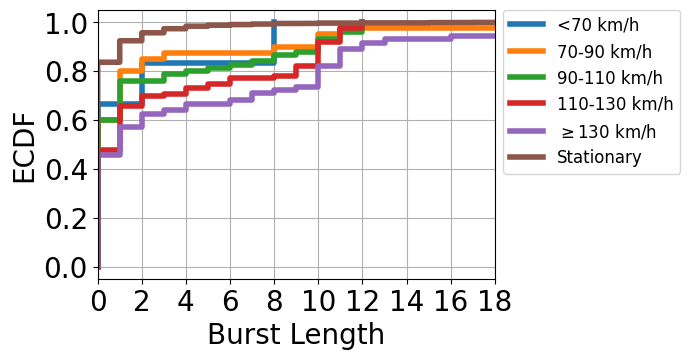

In [7]:
"""Fig. 8 - plot CDF burst loss"""
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

bl_70_sorted = np.sort(bl_70["burst_length"])
#print(bl_70_sorted)
bl_80_sorted = np.sort(bl_80["burst_length"])
bl_100_sorted = np.sort(bl_100["burst_length"])
bl_120_sorted = np.sort(bl_120["burst_length"])
bl_140_sorted = np.sort(bl_140["burst_length"])
burst_lengths_stat_sorted = np.sort(burst_lengths_stat["burst_length"])

y_values_bl_70 = np.arange(len(bl_70_sorted)) / float(len(bl_70_sorted) - 1)
y_values_bl_80 = np.arange(len(bl_80_sorted)) / float(len(bl_80_sorted) - 1)
y_values_bl_100 = np.arange(len(bl_100_sorted)) / float(len(bl_100_sorted) - 1)
y_values_bl_120 = np.arange(len(bl_120_sorted)) / float(len(bl_120_sorted) - 1)
y_values_bl_140 = np.arange(len(bl_140_sorted)) / float(len(bl_140_sorted) - 1)
y_values_bl_stat = np.arange(len(burst_lengths_stat_sorted)) / float(len(burst_lengths_stat_sorted) - 1)

# Plot the CDF
# Define dash pattern
dash_pattern = [3, 1]

fig, ax = plt.subplots(figsize=(7, 3.7))
lwidth = 4
ax.plot(bl_70_sorted, y_values_bl_70, linewidth=lwidth, drawstyle='steps-post', linestyle='-', label="<70 km/h")
ax.plot(bl_80_sorted, y_values_bl_80, linewidth=lwidth, drawstyle='steps-post', linestyle='-', label="70-90 km/h")
ax.plot(bl_100_sorted, y_values_bl_100, linewidth=lwidth, drawstyle='steps-post', linestyle='-', label="90-110 km/h")
ax.plot(bl_120_sorted, y_values_bl_120, linewidth=lwidth, drawstyle='steps-post', linestyle='-', label="110-130 km/h")
ax.plot(bl_140_sorted, y_values_bl_140, linewidth=lwidth, drawstyle='steps-post', linestyle='-', label="$\geq$130 km/h")
ax.plot(burst_lengths_stat_sorted, y_values_bl_stat, linewidth=lwidth, drawstyle='steps-post', linestyle='-', label="Stationary")

# Place legend on top of the plot
#plt.legend(prop={'size': 12}, loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), ncol=2, mode='expand')
plt.legend(prop={'size': 12}, loc='lower left', bbox_to_anchor=(1, 0.36))
#plt.legend(prop={'size': 20}, loc="lower right")
y_ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
x_ticks = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
plt.xlim(0, 15)
plt.yticks(y_ticks, [str(tick) for tick in y_ticks])
plt.xticks(x_ticks, [str(tick) for tick in x_ticks])
fzsize = 20
plt.tick_params(axis='y', labelsize=fzsize)
plt.tick_params(axis='x', labelsize=fzsize)
plt.xlabel('Burst Length', size=fzsize)
plt.ylabel('ECDF', size=fzsize)
#plt.title('Cumulative Distribution Function')
plt.grid(True)
plt.tight_layout()
plt.savefig("Plots/Fig8.pdf", format="pdf")

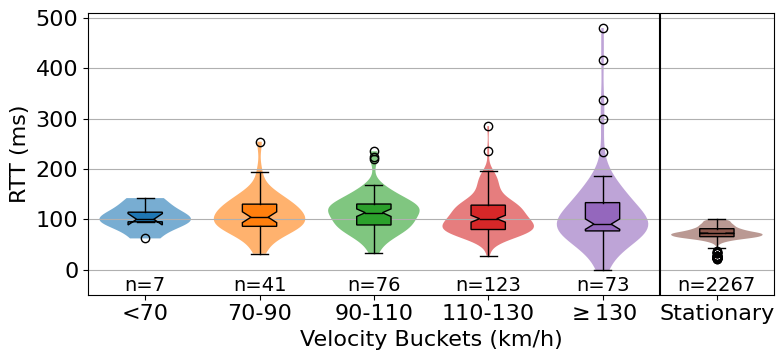

In [8]:
"""Fig. 7 - RTT Handover"""
#filter out bridges

rtt_no_bridges = handover_df_mobile[handover_df_mobile["Bridge ID"].isna()]
rtt_70 = rtt_no_bridges[rtt_no_bridges["Speed(km/h)"] < 70]
rtt_80 = rtt_no_bridges[(rtt_no_bridges["Speed(km/h)"] >= 70) & (rtt_no_bridges["Speed(km/h)"] < 90)]
rtt_100 = rtt_no_bridges[(rtt_no_bridges["Speed(km/h)"] >= 90) & (rtt_no_bridges["Speed(km/h)"] < 110)]
rtt_120 = rtt_no_bridges[(rtt_no_bridges["Speed(km/h)"] >= 110) & (rtt_no_bridges["Speed(km/h)"] < 130)]
rtt_140 = rtt_no_bridges[rtt_no_bridges["Speed(km/h)"] >= 130]

import matplotlib.pyplot as plt

boxplot_data = [rtt_70["time"], rtt_80["time"], rtt_100["time"], rtt_120["time"], rtt_140["time"], handover_df_stat_fhp["time"]]
positions = [1,2,3,4,5,6]
# Plotting
fig, ax = plt.subplots(figsize=(8, 3.7))

# Create the Violin Plots
violin_parts = ax.violinplot(boxplot_data, positions=positions, widths=0.8, showmeans=False, showmedians=False, showextrema=False)

# Set the colors for the violin plot
cmap = plt.get_cmap("tab10")
violin_colors = [cmap(i) for i in range(len(boxplot_data))]
for pc, color in zip(violin_parts['bodies'], violin_colors):
    pc.set_facecolor(color)
#    pc.set_edgecolor('black')
    pc.set_alpha(0.6)  # Adjust transparency if needed

# Create the boxplot
box = ax.boxplot(boxplot_data, positions=positions, widths=0.3, notch=True, patch_artist=True)

#cmap = plt.get_cmap("tab10")
#colors = [cmap(0), cmap(1), cmap(2), cmap(3)]
# Set colors for each box plot
for patch, color in zip(box['boxes'], violin_colors):
    patch.set_facecolor(color)
# Set median line colors to black
for median in box['medians']:
    median.set(color='black')

# Annotate number of samples above each box plot
for i, data in enumerate(boxplot_data):
    sample_size = len(data)
    ax.text(positions[i], -50, f'n={sample_size}', ha='center', va='bottom', fontsize=14, color='black')

# Create custom legend
legend_labels = ['<70', '70-90', '90-110', '110-130', "$\geq$130", "Stationary"]
legend_colors = [cmap(i) for i in range(4)]
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]

#ax.text(1, 8.5, f'n={star_standard_down.shape[0]}', horizontalalignment='center')
#ax.text(2, 8.5, f'n={star_mobile_down.shape[0]}', horizontalalignment='center')
#ax.text(3, 8.5, f'n={star_fhp_down.shape[0]}', horizontalalignment='center')

ax.set_xticklabels(legend_labels)

#ax.set_yscale("log")
#y_ticks = [0, 100, 200, 300, 400, 500]
fzsize = 16
plt.tick_params(axis='y', labelsize=fzsize)
plt.tick_params(axis='x', labelsize=fzsize)
#plt.yticks(y_ticks)
plt.ylim(-50, 510)
plt.grid(axis='y')
ax.set_ylabel('RTT (ms)', size=fzsize)
ax.set_xlabel('Velocity Buckets (km/h)', size=fzsize)
ax.vlines([5.5], -50, 510, colors="black")

plt.tight_layout()
plt.savefig("Plots/Fig7.pdf", format="pdf")